# Graphs
## Solow Model Study
### Powered by:
> Madison's Database    http://www.ggdc.net/maddison/maddison-project/home.htm

In [84]:
GDP_rich_1870()
py.iplot(fig1)

Some selected countries did have convergence before 1990, but diverged since then.

Explain:
1. Some random shock could have large effect: breakout point.
2. Seperate into two growth stages. 
>Fisrst stage: Increase'k'; Intermediate stage: 'k' and 'A' mixed; Second stage: Increase 'A';






In [106]:
asian_four()
py.iplot(fig2)

Aisa Growth Miracle:

>Singapore: Good policy and stable government
>Hongkong: Good timing


>1. They are fast industrialized between the early 1960s and 1990s countries. ('A' improved)

>2. All four Asian Tigers have a highly educated and productive work force compared to others in the region.('A' improved)

>3. The United States helped during the Cold War.(random shock)

>4. They export a lot, because there were rich countries ahead, which have large demand.

>5. People were not very free in the early years, easy to implement policy and they are all small regions



In [35]:
plot_education()
py.iplot(fig)

In [214]:
gdp_growth()
py.iplot(fig3)
py.iplot(fig4)

When we say convergence, we'd better divided countries into 4 categories:
>1. rich and developed countries
>2. countries used to be rich
>3. poor countries
>4. outliers

Pattern of economic growth:
>1. Strong regional connection

>2. Tied to nature resources

>3. Within each categories, there is convergence

>4. Have a breakout point, once lower than the point, the relationship can be opposite

(don't forget to see correlation matrix)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



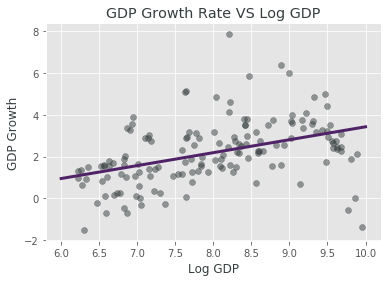

In [252]:
log_gdp()

Some prediction: (exclude random shock)

Sad but true
>1. rich countries will countinue to be rich and growth at a fast rate
>2. poor countries can never catch up, unless the technology can fully penetrate(very hard)
>3. the growth rate is not slowing down in rich countries, can be even faster in the future



# Script
#### All rights reserved by Dai Shiyuan

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import spline
import plotly.plotly as py
import plotly.tools as tls
import pprint
import plotly.graph_objs as go
tls.set_credentials_file(username='cathydai', api_key='gnEOtHlx1QHsOJlr11Qt')
plt.style.use('ggplot')

def read_data():
    GDP_1952 = pd.read_csv('1952GDP.csv')
    gdp = pd.read_excel('mpd_2013-01.xlsx')
    edu = pd.read_csv('World education rankings.csv')
    edu['mean'] = edu.mean(axis = 1)
    return edu, GDP_1952, gdp

def plot_education():
    math = edu['On the mathematics scale']
    sci = edu['On the science scale']
    #print math[:5]
    
    label = edu['Country Name']
    #print label[:5]
    trace = go.Scatter(
        x = math,
        y = sci,
        mode = 'markers',
        text = label
    )
    layout= go.Layout(
        title= 'World Education Level',
        hovermode= 'closest',
        xaxis= dict(
            title= 'Math',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'Science',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= False
    )

    data = [trace]
    fig = dict(data=data, layout=layout)
#py.iplot(fig)
edu = read_data()[0]
GDP_1952 = read_data()[1]
gdp = read_data()[2]
plot_education()

def GDP_rich_1870():
    choose = ['Austria','England/GB/UK','USA','Holland/Netherlands','Japan','(Centre-North)Italy']
    gdp.columns = gdp.columns.str.replace(' ','')
    col_names = gdp.columns.tolist()
    rich = gdp.ix[1870:,choose]
    sub = range(0,len(rich.index)-1,10)

    trace = []
    for i in choose:
        trace_ = go.Scatter(
            x = rich.index,
            y = rich[i],
            mode = 'lines',
            name = i
        )
        trace.append(trace_)
    layout= go.Layout(
            title= 'GDP in rich countries from 1870-2010',
            hovermode= 'closest',
            xaxis= dict(
                title= 'Year',
                ticklen= 5,
                zeroline= False,
                gridwidth= 2,
            ),
            yaxis=dict(
                title= 'GDP',
                ticklen= 5,
                gridwidth= 2,
            ),
            showlegend= False
        )
    data = [trace]
    fig1 = dict(data=data, layout=layout)

GDP_1952 = pd.read_csv('1952GDP.csv')
GDP_1952.columns = GDP_1952.columns.str.replace('Unnamed: 0','year')
GDP_1952.set_index('year', inplace = True)
dropcols = ['Unnamed: 151','Unnamed: 152','Unnamed: 153','Unnamed: 154','Unnamed: 155']
GDP_1952.drop(dropcols, axis = 1, inplace = True)
x = GDP_1952.index.astype(int)
GDP_1952.columns = GDP_1952.columns.str.replace(' ','')
col_names = GDP_1952.columns.tolist()

growth_df = pd.read_csv('gdp_growth.csv', index_col = 0)
data = pd.DataFrame()
data['growth'] =  growth_df.mean()
data['gdp']= GDP_1952.mean()
data['log_gdp']= np.log(GDP_1952.mean())
datat = data.T
    
for name in col_names:
    try:
        GDP_1952[name] = GDP_1952[name].str.replace(',','').astype(float)
    except Exception as e:
        pass

def asian_four():
        #pass
    asia_four = ['Taiwan','Singapore','HongKong','S.Korea','USA']

    trace = []
    for i in asia_four:
        trace_ = go.Scatter(
            x = x,
            y = GDP_1952[i],
            mode = 'lines',
            name = i
            )
        trace.append(trace_)

    layout1= go.Layout(
        title= 'GDP in Four Asian Tigers from 1952-2010',
        hovermode= 'closest',
        xaxis= dict(
            title= 'Year',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
            ),
        yaxis=dict(
            title= 'GDP',
            ticklen= 5,
            gridwidth= 2,
            ),
        showlegend= False
        )
            #data = [trace]
    fig2 = dict(data=trace,layout=layout1)
    py.iplot(fig2)


def log_gdp():
    regr = LinearRegression()

    mean_growth = growth_df.mean()
    log_gdp = np.log(GDP_1952.mean())

    regr.fit(log_gdp.reshape(149,1), mean_growth.reshape(149,1))
    #print log_gdp.values.shape,mean_growth.values.shape
    coef = regr.coef_
    intecept = regr.intercept_
    x = np.arange(6,11).reshape(5,1)
    y = coef * x + intecept
    plt.title('GDP Growth Rate VS Log GDP',color = '#363e3f')
    plt.xlabel('Log GDP',color = '#363e3f')
    plt.ylabel('GDP Growth',color = '#363e3f')
    plt.plot(x,y,color = '#502369', linewidth = 3)
    plt.scatter(log_gdp, mean_growth, color = '#363e3f', alpha = 0.5)
    plt.show()

# for plot correlation matrix
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#import pickle

reload(sys)
sys.setdefaultencoding('utf-8')
corr_matrix = pd.read_csv('growth_correlation.csv', index_col = 0)
data1 = corr_matrix.values  # turn into an array matix
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
heatmap = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
fig1.colorbar(heatmap)
ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
ax1.invert_yaxis()
ax1.xaxis.tick_top()
column_labels = corr_matrix.columns
#row_labels = corr_matrix.index
ax1.set_xticklabels(column_labels)
ax1.set_yticklabels(column_labels)

plt.xticks(rotation=90)
heatmap.set_clim(-1,1)
plt.tight_layout()
#plt.savefig("correlations.png")
#pickle.dump(ax1, file('gdp_corr.pickle', 'w'))
plt.show()
#ax1 = pickle.load(file('gdp_corr.pickle'))
#plt.show()


def gdp_growth():
    
    traces = []
    traces2 = []
    for i in datat.columns:
        trace = go.Scatter(
                    x = datat.ix['gdp',i],
                    y = datat.ix['growth',i],
                    mode = 'markers',
            marker= dict(size= 14,
                        #line= dict(width=1),
                        color= 'k', #502369
                        opacity= 0.5 
                       ),
                    name = i
            )
        traces.append(trace)
        trace2 = go.Scatter(
                    x = datat.ix['gdp',i],
                    y = datat.ix['log_gdp',i],
                    mode = 'markers',
            marker= dict(size= 14,
                        #line= dict(width=1),
                        color= '#105f69',
                        opacity= 0.5
                       ),
                    name = i
            )
        traces2.append(trace2)
    layout= go.Layout(
        title= 'Mean GDP growth vs Mean GDP',
        hovermode= 'closest',
        xaxis= dict(
            title= 'Mean GDP',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'GDP Growth Rate',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= False
    )
    fig3 =dict(data=traces, layout = layout )
    fig4 =dict(data=traces2, layout = layout )
